# Computer Vision 101 with Numpy
In Python, all of the popular image libraries use Numpy arrays to store images. This is because arrays in Numpy has an array structure that allows for contiguous memory in Python. Numpy has optimized various matrix and other general mathematical operations. This makes Numpy arrays much faster than built-in Python Lists.

Numpy is super fast and powerful.

While OpenCV and similar libraries implement most of this functionality for you, it is important to know how they work at a lower level for debugging and writing your own functionality when necessary.

In [1]:
## pip install numpy
import numpy as np

## pip install matplotlib
import matplotlib.image as mpimg  # mpimg.imread(path) to read in an image
import matplotlib.pyplot as plt  # plt.imshow(np.array) to show an image

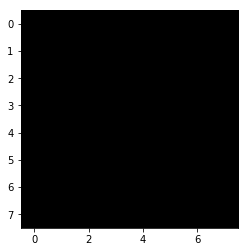

In [2]:
## Creating an image
img = np.zeros(shape=(8, 8))

plt.imshow(img, cmap='gray')
plt.show()

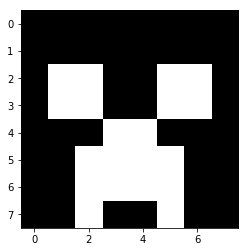

In [3]:
## Manually modifying an image
img = np.zeros(shape=(8, 8))

img[2:4, 1:3] = 1.
img[2:4, 5:7] = 1.
img[4:5, 3:5] = 1.
img[5:7, 2:6] = 1.
img[([7, 7], [2, 5])] = 1.

plt.imshow(img, cmap='gray')  # cmap is color mapping ie func(number) -> color
plt.show()

[[[26 45  0]
  [46 62 13]]

 [[19 34  0]
  [12 27  0]]]


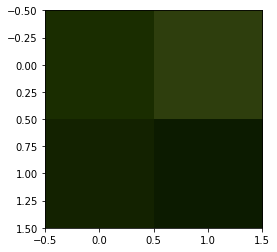

In [4]:
## RGB Pixels as Numpy array
img = mpimg.imread('../input/cat-images/cat.jpg')

## Show the 2x2 pixels from the top left
print(img[:2, : 2])
plt.imshow(img[:2, :2], cmap='gray')
plt.show()

# Manipulating Images

We can use NumPy to manipulate and change images in numerous ways.

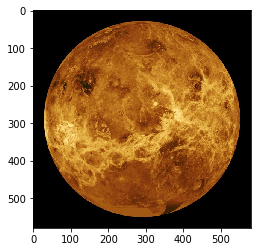

In [5]:
## Read in image
img = mpimg.imread('../input/planet-images/Venus-580x580.jpg')

## Visualize image
plt.imshow(img)
plt.show()

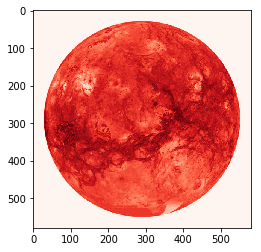

In [6]:
## Extracting color channels via indexing (0 is the red channel)
redchannel = img[:, :, 0]

plt.imshow(redchannel, cmap='Reds')  ## Note change in color map
plt.show()

In [7]:
## Image Dimensions via Shape
# height, width, channels=1
print('Shape of 3 Channel Image')
print(img.shape)
print()
print('Shape of Red Channel Image')
print(redchannel.shape)

Shape of 3 Channel Image
(580, 580, 3)

Shape of Red Channel Image
(580, 580)


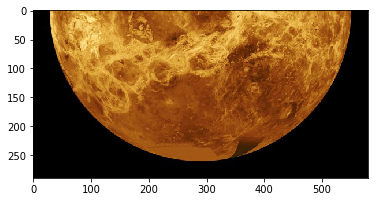

In [8]:
## Cropping image via Slicing
height_split = img.shape[0] // 2

cropped = img[height_split:]

plt.imshow(cropped, cmap='gray')
plt.show()

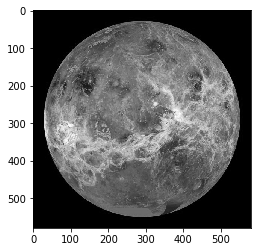

In [9]:
## Grayscaling // Averaging
grayscale = np.mean(img, axis=2)

plt.imshow(grayscale, cmap='gray')
plt.show()

In [10]:
## The Numbers that make the Images
print('RGB Three Channel Image')
print('Shape:', img.shape)
print(img[:2, :2])
print('-'*10)
print('Red Channel of Image')
print('Shape:', redchannel.shape)
print(redchannel[:2, :2])
print('-'*10)
print('Grayscaled 3 Channel Image')
print('Shape:', grayscale.shape)
print(grayscale[:2, :2])
print('')
print('Four channels exist in some images, ie the alpha channel in a .PNG or the depth channel from our realsense cameras.')
print('Notice that the RGB image has 3 numbers per pixel, whereas the red channel and grayscale have 1 number per pixel.')

RGB Three Channel Image
Shape: (580, 580, 3)
[[[0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]]]
----------
Red Channel of Image
Shape: (580, 580)
[[0 0]
 [0 0]]
----------
Grayscaled 3 Channel Image
Shape: (580, 580)
[[0. 0.]
 [0. 0.]]

Four channels exist in some images, ie the alpha channel in a .PNG or the depth channel from our realsense cameras.
Notice that the RGB image has 3 numbers per pixel, whereas the red channel and grayscale have 1 number per pixel.


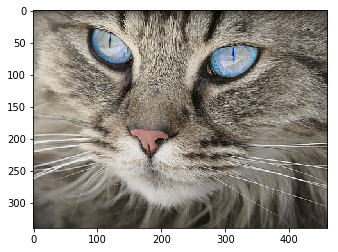

In [11]:
## Cat
img2 = mpimg.imread('../input/cat-images/cat2.jpg')

plt.imshow(img2)
plt.show()

[[[  0 255 255]
  [  0 255 255]]

 [[  0   0 255]
  [  0   0 255]]]


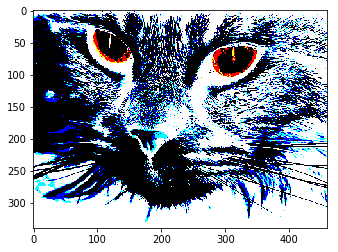

In [12]:
## You can use np.where to set image colors based on a conditional
## In this case, we replace all RGB values below 122 with 255 and all values greater than or equal to 122 with 0
binarize = np.where(img2 < 122, 255, 0)

print(binarize[14:16, :2])

plt.imshow(binarize)
plt.show()

[[  0   0]
 [255 255]]


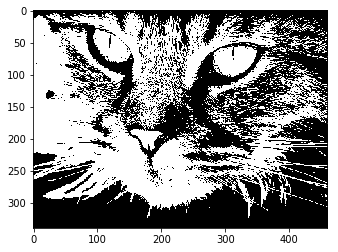

In [13]:
## Binarizing a grayscale image
## Notice that all pixels are either white or black because there is only one color channel
grayscale2 = np.mean(img2, axis=2)

binarize2 = np.where(grayscale2 > 122, 255, 0)

print(binarize2[14:16, :2])

plt.imshow(binarize2, cmap='gray')
plt.show()

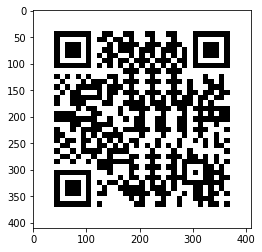

In [14]:
## Read in Image
whole_qr = mpimg.imread('../input/qr-codes/qr_dataset/1011-v4.png')
plt.imshow(whole_qr)
plt.show()

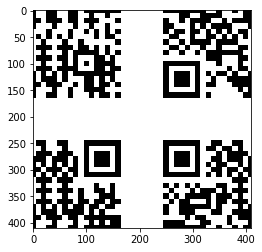

In [15]:
## Split an image with slicing and put it back together
horizontal_split = whole_qr.shape[1] // 2
vertical_split = whole_qr.shape[0] // 2

## Split into quadrants
qr_q1 = whole_qr[:vertical_split, :horizontal_split]
qr_q2 = whole_qr[:vertical_split, horizontal_split:]
qr_q3 = whole_qr[vertical_split:, :horizontal_split]
qr_q4 = whole_qr[vertical_split:, horizontal_split:]

## Combine quadrants and show

## Combine sections horizontally
top = np.concatenate((qr_q4, qr_q3), axis=1)
bottom = np.concatenate((qr_q2, qr_q1), axis=1)

## Combine the two halves vertically
new_qr = np.concatenate((top, bottom), axis=0)

plt.imshow(new_qr)
plt.show()

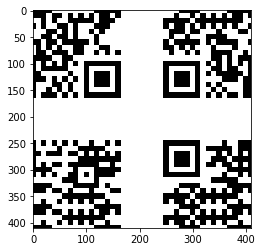

In [16]:
## Rotate images in numpy
# Note: cannot transpose 3 channel image because it will break the 3 channel system.

# 90 degrees
rotated = np.rot90(new_qr)

plt.imshow(rotated)
plt.show()

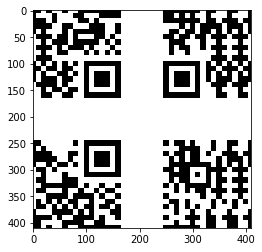

In [17]:
## Rotate again to 180 degrees
rotated = np.rot90(rotated)

plt.imshow(rotated)
plt.show()

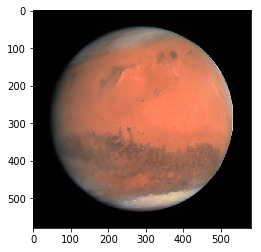

In [18]:
## Get a new planet
planet = mpimg.imread('../input/planet-images/True-colour_image_of_Mars_seen_by_OSIRIS-580x580.jpg')

plt.imshow(planet)
plt.show()

# Goal is to make the planet blue

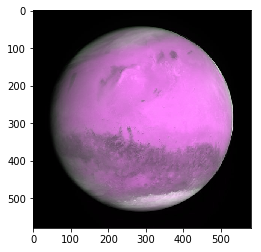

In [19]:
## Flipping the red and blue channels turns the planet purple
planet2 = np.copy(planet)

buffer = planet2[:, :, 2]
planet2[:, :, 2] = planet2[:, :, 0]
planet2[:, :, 0] = buffer

plt.imshow(planet2)
plt.show()

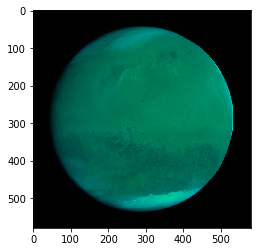

In [20]:
## Removing the red channel turns the planet green
planet3 = np.copy(planet)

planet3[:, :, 0] = 0

plt.imshow(planet3)
plt.show()

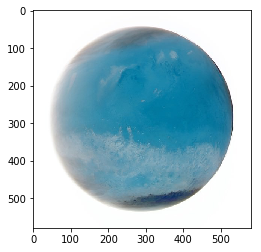

In [21]:
## Inverting the image turns the planet blue
planet4 = np.copy(planet)

planet4 = 255 - planet4

plt.imshow(planet4)
plt.show()

In [22]:
## We can use numpy to add two arrays
# Example
a = np.arange(0, 255, 25)
inverse_a = 255 - a

print('a:', a)
print('inverse of a:', inverse_a)
print('a + inverse of a:', a + inverse_a)

a: [  0  25  50  75 100 125 150 175 200 225 250]
inverse of a: [255 230 205 180 155 130 105  80  55  30   5]
a + inverse of a: [255 255 255 255 255 255 255 255 255 255 255]


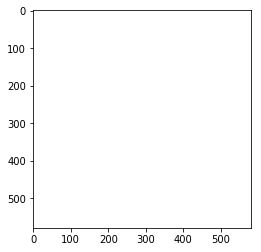

In [23]:
## We can apply this to images

# Planet + (255 - Planet)
plt.imshow(planet + planet4)
plt.show()

Mask, true if the given pixel is pure white
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


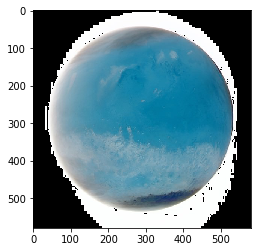

In [24]:
## The original image had a black background, so the goal here is to acheive that with planet4
planet4_better = np.copy(planet4)

# this is called a mask, just like the one in a masked array
white_spots = np.sum(planet4, axis=2) == 255 * 3

print('Mask, true if the given pixel is pure white')
print(white_spots)

# the mask is then used to index the values in planet4_better that have white pixels
planet4_better[white_spots] = np.array([0, 0, 0])

plt.imshow(planet4_better)
plt.show()

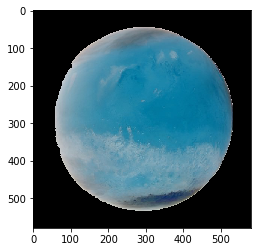

In [25]:
## Images are not exact, you gotta work with the noise my dude
planet4_way_better = np.copy(planet4_better)

# this is called a mask, just like the one in a masked array
somewhat_white_spots = np.mean(planet4, axis=2) >= 200

# the mask is then used to index the values in planet4_better that have white pixels
planet4_way_better[somewhat_white_spots] = np.array([0, 0, 0])

plt.imshow(planet4_way_better)
plt.show()

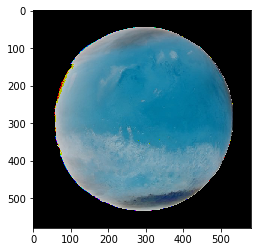

In [26]:
## We can achieve similar results using np.where
planet5 = np.copy(planet4)

planet5 = np.where(planet5 >= 200, 0, planet5)

plt.imshow(planet5)
plt.show()

In [27]:
## Note that planet5 and planet4_way_better are not the same
## This is because np.where is checking whether each individual RGB value is greater than or equal to 200,
## whereas our mask for planet4_way_better checks the mean of the RGB values for each pixel.
## This makes planet5 slightly blurry.
print(np.array_equal(planet5, planet4_way_better))

False


# Changing Size

We can also change the dimensions of an image. To reduce the size of an image, we can remove pixels. This results in a loss of information, but reduces the size as desired.

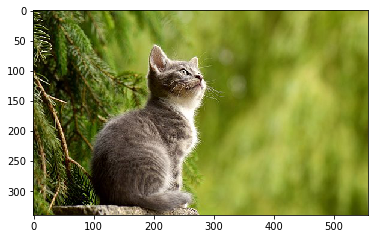

In [28]:
## Cat
cat = mpimg.imread('../input/cat-images/cat.jpg')

plt.imshow(cat)
plt.show()

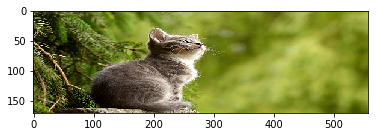

In [29]:
## Shrinking an Image
# note: _ is because we dont care about the number of channels
cat_height, cat_width, _ = cat.shape

half_height_image = np.copy(cat)

# Cut the height in half
half_height_image = half_height_image[np.arange(0, cat_height, 2)]

plt.imshow(half_height_image)
plt.show()

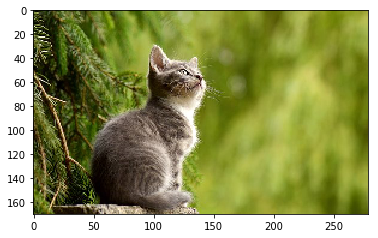

In [30]:
# Cut the width in half
half_size_image = np.copy(half_height_image)

half_size_image = half_size_image[:, np.arange(0, cat_width, 2)]

plt.imshow(half_size_image)
plt.show()

Part 2:

https://www.kaggle.com/cameronfalls/intro-to-computer-vision-2